In [2]:
import talib
import pandas as pd
import numpy as np
from itertools import chain 

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras import regularizers
np.random.seed(2020)

In [4]:
import matplotlib.pyplot as plt

In [5]:
df=pd.read_csv("TataMotorsTrain.csv")
df1=pd.read_csv("TataMotorsVal.csv")  #Validation-set
df2=pd.read_csv("TataMotorsTest.csv")  #test-set

In [6]:
df['result']=0
df1['result']=0
df2['result']=0

In [7]:
def labelling(data):
    windowsize = 11
    counterrow = 0
    numberofdays = data.shape[0]
    result = np.array(data['result'])
    while(counterrow < numberofdays):
        counterrow = counterrow + 1
        if(counterrow > windowsize):
            windowbeginindex = counterrow - windowsize
            windowendindex = windowbeginindex + windowsize - 1
            windowmiddleindex = (windowbeginindex + windowendindex)/2
            minimum = max(data['Adj Close'])
            maximum = 0
            for i in range(windowbeginindex-1, windowendindex):               
                number = data['Adj Close'].iloc[i]
                if(number < minimum):
                    minimum = number
                    minindex = i
                if(number > maximum):
                    maximum = number
                    maxindex = i
            result[minindex] = 1    ## 1 for buy  ,  0 for hold
            result[maxindex] = 2    ## 2 for sell
    return result

In [8]:
df["result"]=labelling(df)
df1["result"]=labelling(df1)
df2["result"]=labelling(df2)

In [9]:
for n in range(6,21):
    df['rsi' + str(n)] = talib.RSI(df['Adj Close'].values, timeperiod=n)
    df['roc' + str(n)] = talib.ROC(df['Adj Close'].values, timeperiod=n)
    df['sma' + str(n)] = talib.SMA(df['Adj Close'].values, timeperiod=n)
    df['ema' + str(n)] = talib.EMA(df['Adj Close'].values, timeperiod=n)
    df['wma' + str(n)] = talib.WMA(df['Adj Close'].values, timeperiod=n)
    df['tema' + str(n)] = talib.TEMA(df['Adj Close'].values, timeperiod=n)
    df['william' + str(n)] = talib.WILLR(df['High'].values,df['Low'].values,df['Adj Close'].values, timeperiod=n)
    df['cci' + str(n)] = talib.CCI(df['High'].values,df['Low'].values,df['Adj Close'].values, timeperiod=n)
    df['cmo' + str(n)] = talib.CMO(df['Adj Close'].values, timeperiod=n)
    df['macd' + str(n)],df['macdSignal' + str(n)] ,df['macdHist' + str(n)]  = talib.MACD(df['Adj Close'].values,fastperiod=12, slowperiod=26, signalperiod=9)
    df['ppo' + str(n)] = talib.PPO(df['Adj Close'].values, fastperiod=12, slowperiod=26, matype=0)
    df['parabolicsar'+ str(n)] = talib.SAR(df['High'].values, df['Low'].values, acceleration=0, maximum=0)  
    
for n in range(6,21):
    df1['rsi' + str(n)] = talib.RSI(df1['Adj Close'].values, timeperiod=n)
    df1['roc' + str(n)] = talib.ROC(df1['Adj Close'].values, timeperiod=n)
    df1['sma' + str(n)] = talib.SMA(df1['Adj Close'].values, timeperiod=n)
    df1['ema' + str(n)] = talib.EMA(df1['Adj Close'].values, timeperiod=n)
    df1['wma' + str(n)] = talib.WMA(df1['Adj Close'].values, timeperiod=n)
    df1['tema' + str(n)] = talib.TEMA(df1['Adj Close'].values, timeperiod=n)
    df1['william' + str(n)] = talib.WILLR(df1['High'].values,df1['Low'].values,df1['Adj Close'].values, timeperiod=n)
    df1['cci' + str(n)] = talib.CCI(df1['High'].values,df1['Low'].values,df1['Adj Close'].values, timeperiod=n)
    df1['cmo' + str(n)] = talib.CMO(df1['Adj Close'].values, timeperiod=n)
    df1['macd' + str(n)],df1['macdSignal' + str(n)] ,df1['macdHist' + str(n)]  = talib.MACD(df1['Adj Close'].values,fastperiod=12, slowperiod=26, signalperiod=9)
    df1['ppo' + str(n)] = talib.PPO(df1['Adj Close'].values, fastperiod=12, slowperiod=26, matype=0)
    df1['parabolicsar'+ str(n)] = talib.SAR(df1['High'].values, df1['Low'].values, acceleration=0, maximum=0)  
    
for n in range(6,21):
    df2['rsi' + str(n)] = talib.RSI(df2['Adj Close'].values, timeperiod=n)
    df2['roc' + str(n)] = talib.ROC(df2['Adj Close'].values, timeperiod=n)
    df2['sma' + str(n)] = talib.SMA(df2['Adj Close'].values, timeperiod=n)
    df2['ema' + str(n)] = talib.EMA(df2['Adj Close'].values, timeperiod=n)
    df2['wma' + str(n)] = talib.WMA(df2['Adj Close'].values, timeperiod=n)
    df2['tema' + str(n)] = talib.TEMA(df2['Adj Close'].values, timeperiod=n)
    df2['william' + str(n)] = talib.WILLR(df2['High'].values,df2['Low'].values,df2['Adj Close'].values, timeperiod=n)
    df2['cci' + str(n)] = talib.CCI(df2['High'].values,df2['Low'].values,df2['Adj Close'].values, timeperiod=n)
    df2['cmo' + str(n)] = talib.CMO(df2['Adj Close'].values, timeperiod=n)
    df2['macd' + str(n)],df2['macdSignal' + str(n)] ,df2['macdHist' + str(n)]  = talib.MACD(df2['Adj Close'].values,fastperiod=12, slowperiod=26, signalperiod=9)
    df2['ppo' + str(n)] = talib.PPO(df2['Adj Close'].values, fastperiod=12, slowperiod=26, matype=0)
    df2['parabolicsar'+ str(n)] = talib.SAR(df2['High'].values, df2['Low'].values, acceleration=0, maximum=0)  

In [10]:
rsi=df[['rsi'+str(n) for n in range(6,21)]].to_numpy()
roc=df[['roc'+str(n) for n in range(6,21)]].to_numpy()
sma=df[['sma'+str(n) for n in range(6,21)]].to_numpy()
ema=df[['ema'+str(n) for n in range(6,21)]].to_numpy()
wma=df[['wma'+str(n) for n in range(6,21)]].to_numpy()
tema=df[['tema'+str(n) for n in range(6,21)]].to_numpy()
william=df[['william'+str(n) for n in range(6,21)]].to_numpy()
cci=df[['cci'+str(n) for n in range(6,21)]].to_numpy()
cmo=df[['cmo'+str(n) for n in range(6,21)]].to_numpy()
macd=df[['macd'+str(n) for n in range(6,21)]].to_numpy()
ppo=df[['ppo'+str(n) for n in range(6,21)]].to_numpy()
parabolicsar=df[['parabolicsar'+str(n) for n in range(6,21)]].to_numpy()


rsi1=df1[['rsi'+str(n) for n in range(6,21)]].to_numpy()
roc1=df1[['roc'+str(n) for n in range(6,21)]].to_numpy()
sma1=df1[['sma'+str(n) for n in range(6,21)]].to_numpy()
ema1=df1[['ema'+str(n) for n in range(6,21)]].to_numpy()
wma1=df1[['wma'+str(n) for n in range(6,21)]].to_numpy()
tema1=df1[['tema'+str(n) for n in range(6,21)]].to_numpy()
william1=df1[['william'+str(n) for n in range(6,21)]].to_numpy()
cci1=df1[['cci'+str(n) for n in range(6,21)]].to_numpy()
cmo1=df1[['cmo'+str(n) for n in range(6,21)]].to_numpy()
macd1=df1[['macd'+str(n) for n in range(6,21)]].to_numpy()
ppo1=df1[['ppo'+str(n) for n in range(6,21)]].to_numpy()
parabolicsar1=df1[['parabolicsar'+str(n) for n in range(6,21)]].to_numpy()

rsi2=df2[['rsi'+str(n) for n in range(6,21)]].to_numpy()
roc2=df2[['roc'+str(n) for n in range(6,21)]].to_numpy()
sma2=df2[['sma'+str(n) for n in range(6,21)]].to_numpy()
ema2=df2[['ema'+str(n) for n in range(6,21)]].to_numpy()
wma2=df2[['wma'+str(n) for n in range(6,21)]].to_numpy()
tema2=df2[['tema'+str(n) for n in range(6,21)]].to_numpy()
william2=df2[['william'+str(n) for n in range(6,21)]].to_numpy()
cci2=df2[['cci'+str(n) for n in range(6,21)]].to_numpy()
cmo2=df2[['cmo'+str(n) for n in range(6,21)]].to_numpy()
macd2=df2[['macd'+str(n) for n in range(6,21)]].to_numpy()
ppo2=df2[['ppo'+str(n) for n in range(6,21)]].to_numpy()
parabolicsar2=df2[['parabolicsar'+str(n) for n in range(6,21)]].to_numpy()

In [11]:
train_images=[[j for j in chain.from_iterable([rsi[i],roc[i],sma[i],ema[i],william[i],cci[i],cmo[i],macd[i],ppo[i],tema[i],wma[i],parabolicsar[i]])]for i in df.index]

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(-1,1))

train_images=np.array(train_images)
train_images=scaler.fit_transform(train_images)
train_images=train_images.reshape(1483,12,15,1)
train_labels=df["result"].to_numpy()

C:\Users\m5in\anaconda3\envs\opencv-env\lib\site-packages\sklearn\preprocessing\_data.py:373: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
C:\Users\m5in\anaconda3\envs\opencv-env\lib\site-packages\sklearn\preprocessing\_data.py:374: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


In [13]:
validate_images=[[j for j in chain.from_iterable([rsi1[i],roc1[i],sma1[i],ema1[i],william1[i],cci1[i],cmo1[i],macd1[i],ppo1[i],tema1[i],wma1[i],parabolicsar1[i]])]for i in df1.index]
validate_images=np.array(validate_images)
validate_images=scaler.fit_transform(validate_images)
validate_images=validate_images.reshape(346,12,15,1)
validate_labels=df1["result"].to_numpy()

test_images=[[j for j in chain.from_iterable([rsi2[i],roc2[i],sma2[i],ema2[i],william2[i],cci2[i],cmo2[i],macd2[i],ppo2[i],tema2[i],wma2[i],parabolicsar2[i]])]for i in df2.index]
test_images=np.array(test_images)
test_images=scaler.fit_transform(test_images)
test_images=test_images.reshape(306,12,15,1)
test_labels=df2["result"].to_numpy()

In [14]:
class_names = ['Hold','Buy','Sell']

In [15]:
train_images=np.nan_to_num(train_images)
a=np.amax(train_images)
train_images/=a

validate_images=np.nan_to_num(validate_images)
a=np.amax(validate_images)
validate_images/=a

test_images=np.nan_to_num(test_images)
a=np.amax(test_images)
test_images/=a

In [16]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(12,15,1)))
#model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.25,seed=0))
model.add(layers.Flatten())
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(3))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 10, 13, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 11, 64)         18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 4, 5, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 4, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               163968    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

In [18]:
from keras.utils import np_utils

train_labels = np_utils.to_categorical(train_labels, 3)
validate_labels = np_utils.to_categorical(validate_labels, 3)
test_labels = np_utils.to_categorical(test_labels,3)

Using TensorFlow backend.


In [19]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']) 

history = model.fit(train_images, train_labels, epochs=100,batch_size=64, 
                validation_data=(validate_images, validate_labels))



Train on 1483 samples, validate on 346 samples
Epoch 1/100
1483/1483 [==============================] - 1s 682us/sample - loss: 1.0209 - acc: 0.5064 - val_loss: 1.1101 - val_acc: 0.4798
Epoch 2/100
1483/1483 [==============================] - 1s 380us/sample - loss: 0.9636 - acc: 0.5597 - val_loss: 1.1242 - val_acc: 0.5087
Epoch 3/100
1483/1483 [==============================] - 1s 358us/sample - loss: 0.9648 - acc: 0.5637 - val_loss: 1.0007 - val_acc: 0.5462
Epoch 4/100
1483/1483 [==============================] - 1s 395us/sample - loss: 0.9356 - acc: 0.5806 - val_loss: 0.9910 - val_acc: 0.5636
Epoch 5/100
1483/1483 [==============================] - 1s 391us/sample - loss: 0.9387 - acc: 0.5799 - val_loss: 0.9915 - val_acc: 0.5376
Epoch 6/100
1483/1483 [==============================] - 1s 387us/sample - loss: 0.9168 - acc: 0.5995 - val_loss: 0.9990 - val_acc: 0.5462
Epoch 7/100
1483/1483 [==============================] - 1s 345us/sample - loss: 0.9225 - acc: 0.5988 - val_loss: 0.981

Epoch 59/100
1483/1483 [==============================] - 1s 425us/sample - loss: 0.7995 - acc: 0.6554 - val_loss: 1.2572 - val_acc: 0.4566
Epoch 60/100
1483/1483 [==============================] - 1s 423us/sample - loss: 0.8073 - acc: 0.6507 - val_loss: 1.2078 - val_acc: 0.4538
Epoch 61/100
1483/1483 [==============================] - 1s 421us/sample - loss: 0.8108 - acc: 0.6507 - val_loss: 1.1616 - val_acc: 0.4855
Epoch 62/100
1483/1483 [==============================] - 1s 427us/sample - loss: 0.8052 - acc: 0.6480 - val_loss: 1.2570 - val_acc: 0.4682
Epoch 63/100
1483/1483 [==============================] - 1s 420us/sample - loss: 0.8057 - acc: 0.6507 - val_loss: 1.1897 - val_acc: 0.4538
Epoch 64/100
1483/1483 [==============================] - 1s 422us/sample - loss: 0.8001 - acc: 0.6548 - val_loss: 1.2132 - val_acc: 0.4740
Epoch 65/100
1483/1483 [==============================] - 1s 494us/sample - loss: 0.8027 - acc: 0.6548 - val_loss: 1.2653 - val_acc: 0.4480
Epoch 66/100
1483/14

In [20]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

306/306 - 0s - loss: 1.3116 - acc: 0.5327


In [21]:
print(test_acc)

0.53267974


346/346 - 0s - loss: 1.5121 - acc: 0.4162


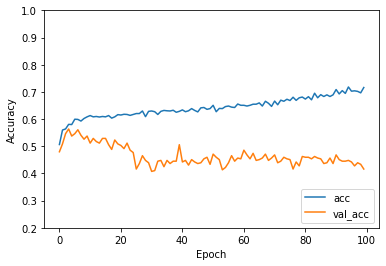

In [22]:
plt.plot(history.history['acc'], label='acc')
plt.plot(history.history['val_acc'], label = 'val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.2, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(validate_images,  validate_labels, verbose=2)

In [23]:
class_pred = model.predict(test_images,batch_size=16)
print(class_pred[10])

[ 0.5880207  1.5323483 -2.6163125]


In [24]:
labels_pred=np.argmax(class_pred,axis=1)
df2["pred_res"]=labels_pred

In [25]:
correct=(labels_pred == test_labels.argmax(axis=1))
print(correct)
print("Numbers of correct prediction:%d" %sum(correct))
a =len(correct)
print("Accuracy:%f" %((sum(correct)*100)/a))

[False False  True  True  True False False False  True  True  True  True
 False  True False False  True  True  True  True  True  True  True  True
  True False  True False False  True  True  True False False False False
  True False False False False False False  True False False False  True
 False False  True  True  True  True  True False  True  True  True False
 False False  True False False False  True  True  True  True  True  True
 False  True False  True False False False False False False  True  True
  True  True False False  True  True False  True  True  True  True  True
 False  True  True False  True  True False False False  True False False
 False  True  True False False  True  True  True False False  True False
 False  True False  True False False False  True  True False  True  True
 False  True  True False False False False  True  True  True  True  True
  True  True  True False  True  True False  True  True False False False
 False  True False False False False False False Fa

In [26]:
df2['prediction']=labels_pred
icost=[]
buy_l=[]
cost=0
buy_c=0
buy=0
sell=0
win=0
loss=0

for i in df2.index:
    if(df2['prediction'][i]==0):
        if(buy_c<=0):
            buy_c=buy_c+1
            buy=buy+1
            cost=cost - df2['Adj Close'][i]
            x=df2['Adj Close'][i]
            #print(cost)
            buy_l.append(x)
            print("date : {}, cost : {},buy_c:{},price:{}".format(i, cost,buy_c,x),'Buy')
    if(df2['prediction'][i]==2):
        y=df2['Adj Close'][i]
        if(buy_c>=1):
            if(y-x>0):
                buy_c=buy_c-1
                sell=sell+1
                cost=cost+df2['Adj Close'][i]
                print("date : {}, cost :{},buy_c:{},price:{}".format(i, cost,buy_c,y),"Sell")
                if((buy>0) & (sell>0)):
                    if(y-x<0):
                        loss=loss+1
                    if(y-x>0):
                        win=win+1
                    icost.append(y-x)
    if(df2['prediction'][i]==1):
        continue
    
    
    
  
print(cost)
#print((cost-icost)/icost)
print(buy)
print(sell)
print("win:",win)
print('loss:',loss)

date : 0, cost : -174.550003,buy_c:1,price:174.550003 Buy
date : 100, cost :3.1499939999999924,buy_c:0,price:177.699997 Sell
date : 104, cost : -171.20001200000002,buy_c:1,price:174.350006 Buy
date : 130, cost :5.449981999999977,buy_c:0,price:176.649994 Sell
date : 131, cost : -169.45001200000002,buy_c:1,price:174.899994 Buy
date : 140, cost :14.149993999999992,buy_c:0,price:183.600006 Sell
date : 142, cost : -170.25,buy_c:1,price:184.399994 Buy
date : 143, cost :23.600006000000008,buy_c:0,price:193.850006 Sell
date : 144, cost : -167.449997,buy_c:1,price:191.050003 Buy
date : 149, cost :28.949996999999996,buy_c:0,price:196.399994 Sell
date : 151, cost : -166.800003,buy_c:1,price:195.75 Buy
date : 152, cost :33.5,buy_c:0,price:200.300003 Sell
date : 153, cost : -164.0,buy_c:1,price:197.5 Buy
-164.0
7
6
win: 6
loss: 0


In [27]:
yhat_classes=df2["prediction"]
testy=df2["result"]

In [28]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 

In [29]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(testy, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(testy, yhat_classes ,average='macro')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(testy, yhat_classes,average='macro')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(testy, yhat_classes,average='macro')
print('F1 score: %f' % f1)

Accuracy: 0.532680
Precision: 0.515297
Recall: 0.509717
F1 score: 0.510155


In [30]:
results = confusion_matrix(testy, yhat_classes) 
  
print ('Confusion Matrix :')
print(results) 
print ('Accuracy Score :',accuracy_score(testy, yhat_classes))
print("Report")
print (classification_report(testy, yhat_classes))


Confusion Matrix :
[[87 26 14]
 [30 32 22]
 [29 22 44]]
Accuracy Score : 0.5326797385620915
Report
              precision    recall  f1-score   support

           0       0.60      0.69      0.64       127
           1       0.40      0.38      0.39        84
           2       0.55      0.46      0.50        95

    accuracy                           0.53       306
   macro avg       0.52      0.51      0.51       306
weighted avg       0.53      0.53      0.53       306

